## Investigating the numpy.random package

![numpy.jpg](numpy.jpg)
[NumPy](http://www.numpy.org/) (which stands for Numerical Python) is a library for the Python programming language, that adds support for huge multi-dimensional arrays and matrices of numbers. It also provides a large collection of high-level mathematical functions to operate on these arrays, and executes much faster than standard Python for this. It is an open source project and free to import, generally labelled in Python code as "np". It is part of the [SciPy](https://scipy.org/) ecosystem for Python, which also includes such libraries as pandas and matplotlib.

Randomly generated data is important in [various kinds of statistical research as well as aspects of computer science such as simulation and cryptography](https://en.wikipedia.org/wiki/Random_number_generation) and other areas where unpredictable results are necessary, for example, lottery-gaming, draws and slot machines. In the case of statistical research, such as surveys that are based on a representative sample of a population (where it would not be feasible to survey an entire nation, for example!) a [probability sampling method](https://www.statisticshowto.datasciencecentral.com/probability-sampling/) can be designed to ensure that each member of a specific population has a known and equal chance of being included in a random sample.  Random sampling provides an unbiased interpretation of results.

[numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) is a submodule of the NumPy package that is used to generate random (or indeed, pseudorandom) numbers, using  an algorithm called the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister), a pseudorandom number generator (PRNG). 



This means that numpy.random can provide numbers that appear to be unpredicted and indetermined, but that it actually does not generate numbers that are random in the *truest* sense of the term, rather it's sequence is based on random seed generation, which I'll discuss later in this assignment. 

In programming, randomly generated numbers can be used to test and debug code, but it is important to have consistency in the tests, so for this reason, fixing the seed of the random module can help. (http://hplgit.github.io/scipro-primer/slides/random/html/random-reveal.html) https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array


## Simple random data



I decided to try out the various functions that are part of the numpy.random submodule to see if running and testing them could help me to understand what each of them does. The first function in the list is **random.rand**, which according to the NumPy manual will [create an array of the given shape and populate it with random samples](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand) from a uniform distribution over [0,1)] I understand this to mean that this function will display an array (which is almost like a table or database, consisting of rows and columns) of floats based on a shape defined by the user to determine the dimensions of the array, but that the content will consist of floats that range between 0 to 0.99 (i.e. up to but not including 1), in a [uniform distribution](https://www.investopedia.com/terms/u/uniform-distribution.asp) (which means that the probability of all outcomes have exactly the same possibility of happening). 

In [6]:
import numpy as np
np.random.rand(4,3)

array([[0.8266846 , 0.71375254, 0.47572014],
       [0.87536387, 0.56812139, 0.19830999],
       [0.35023229, 0.55519758, 0.78933222],
       [0.42137787, 0.7687541 , 0.10450947]])

I can see from the above that an array of 4 rows and 3 columns has been created, all with randomly selected values that range from 0 to 0.99999999.

In [1]:
import numpy as np
np.random.randint(2, size=10)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

I noticed that the arguments passed through this function were 1 and 101, not 100, as this command follows standard Python practice of indexing from 0. Again, the NumPy documentation gave some detail on the distribution of the data created by this function and states that it is of the "discrete uniform" distribution.  To see what this might mean I decided to run this function again but also plot the output, using matplotlib.

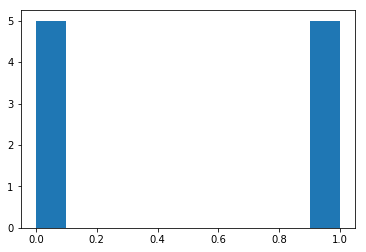

In [6]:
import numpy as np
x = np.random.randint(2, size=10)
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()
#the function np.random.integers has been deprecated and replaced with the above np.random.randint

I noticed from the [Numpy documentation page on numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) that the next four functions (**random_sample**, **random**, **ranf**, and **sample** functions) all return random floats in the half open interval (again from 0.0 up to but not including 1.0) in the "continuous uniform" distribution.  

<function matplotlib.pyplot.show(*args, **kw)>

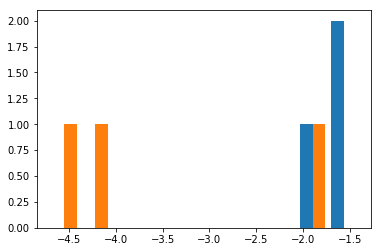

In [8]:
%matplotlib inline 
import numpy as np
y = 5 * np.random.random_sample((3, 2)) - 5
import matplotlib.pyplot as plt
plt.hist(y)
plt.show

I borrowed from the example code in the NumPy documentation again and to gain more understanding of the distribution, I plotted these results too.

## Permutations
The Permutations functions of numpy.random are [shuffle(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.shuffle.html) and [permutation(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation).  

Both of these functions relate to re-arranging provided random data. The shuffle(x) function shuffles data on the first axis of a multi-dimensional array, where the order of sub-arrays is changed but the contents remain the same:


### Multi Dimensional Array

In [4]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
import numpy as np
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.random.shuffle(M)
M

array([[4, 5, 6],
       [1, 2, 3],
       [7, 8, 9]])

As you can see above, the sequence that the sets are displayed in has been shuffled, but the numbers inside the brackets have remained in the same order they were originally written in.

### 1 Dimensional Array
With an array that is 1 Dimensional, the shuffle(x) function 

In [5]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
import numpy as np
M = np.array([4,8,15,16,23,42])
np.random.shuffle(M)
M

array([ 4, 15, 42,  8, 23, 16])

As you can see above, the sequence that the sets are displayed in has been shuffled, but the contents inside the brackets have remained in the same order.

The permutation(x) function however, when given an array, takes a copy and shuffles the elements randomly. 

In [6]:
#example using an array from https://www.w3cschool.cn/doc_numpy_1_10/numpy_1_10-generated-numpy-random-permutation.html
import numpy as np
array = np.random.permutation([1, 4, 9, 12, 15])
array

array([ 9, 12,  4, 15,  1])

In the case of an integer, the permutation function randomly permutes it's range:

In [7]:
#example using an integer 
import numpy as np
integer = np.random.permutation(8)
integer

array([0, 5, 1, 7, 6, 3, 2, 4])